In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import itertools

from sklearn.model_selection import TimeSeriesSplit

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_full_sales_data, get_opsd_data

In [48]:
sales = get_full_sales_data()
sales.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [49]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'
sales.sale_date = pd.to_datetime(sales.sale_date, format = fmt)

In [50]:
sales.sort_values(by = 'sale_date', inplace= True)
sales.set_index('sale_date', inplace=True)

In [128]:
sales.head()
daily_sales = sales.sale_amount.resample('d').mean()

In [129]:
tss = TimeSeriesSplit(n_splits =5)
train = []
test = []
for train_index, test_index in tss.split(daily_sales):
    train.append(train_index)
    test.append(test_index)

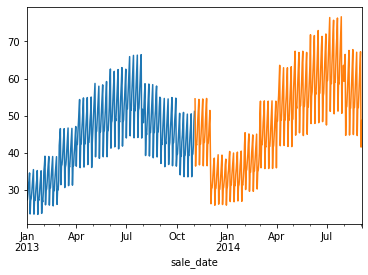

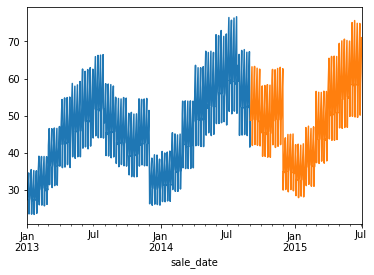

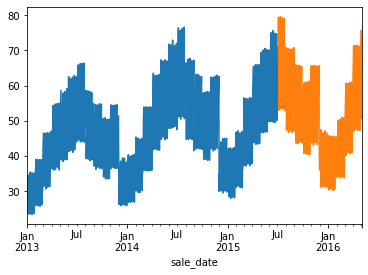

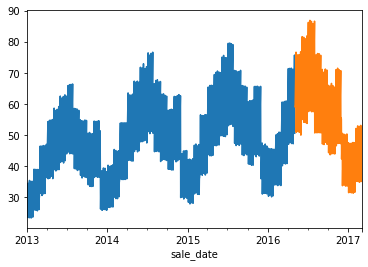

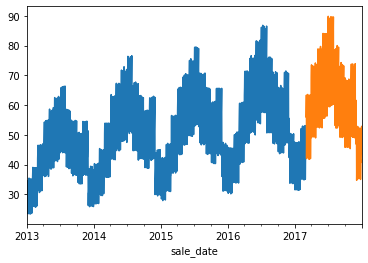

In [139]:
for i in range(5):
    daily_sales[train[i]].plot()
    daily_sales[test[i]].plot()
    plt.show()

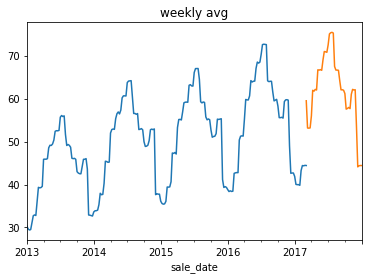

In [143]:
daily_sales[train[4]].resample('w').mean().plot()
daily_sales[test[4]].resample('w').mean().plot()
plt.title('weekly avg')
plt.show()

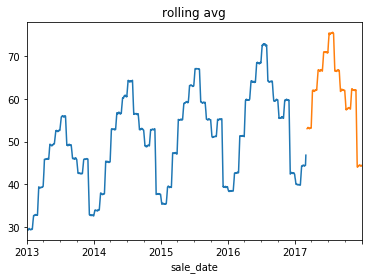

In [144]:
daily_sales[train[4]].rolling(7).mean().plot()
daily_sales[test[4]].rolling(7).mean().plot()
plt.title('rolling avg')
plt.show()

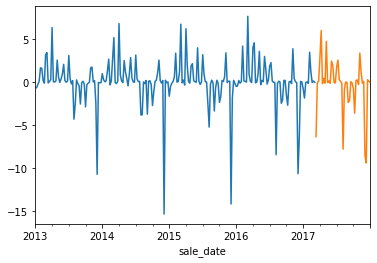

In [145]:
daily_sales[train[4]].resample('w').mean().diff(periods = 1).plot()
daily_sales[test[4]].resample('w').mean().diff(periods = 1).plot()
plt.show()

In [136]:
decomp = sm.tsa.seasonal_decompose(daily_sales[train[4]].resample('w').mean(), model='addative')

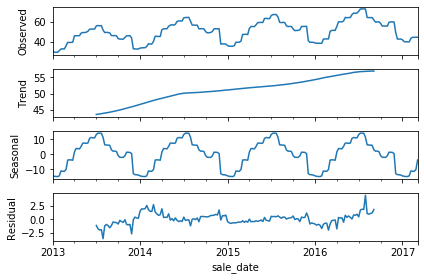

In [137]:
decomp.plot()
plt.show()

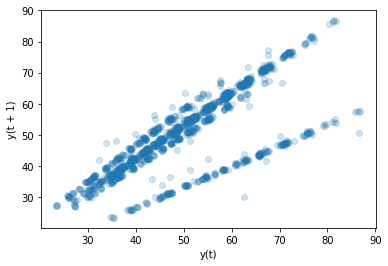

In [149]:
pd.plotting.lag_plot(daily_sales[train[4]], lag=1, alpha = .2)

In [153]:
ops = get_opsd_data()

In [154]:
ops.head(1)

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN


In [155]:
ops.drop(columns='Unnamed: 0', inplace = True)


In [156]:
ops.Date = pd.to_datetime(ops.Date)
ops.set_index('Date', inplace = True)

In [157]:
ops = ops.resample('d').sum()

In [158]:
ops.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [159]:
tss = TimeSeriesSplit(n_splits=3)
train = []
test = []
for train_index, test_index in tss.split(ops):
    train.append(train_index)
    test.append(test_index)

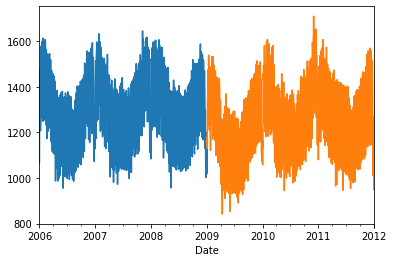

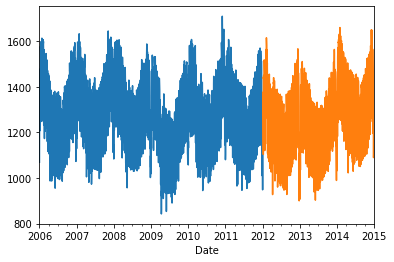

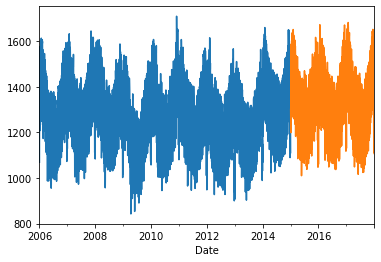

In [160]:
for i in range(3):
    ops.Consumption[train[i]].plot()
    ops.Consumption[test[i]].plot()
    plt.show()

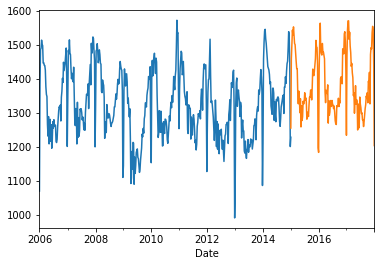

In [161]:
ops.Consumption[train[i]].resample('w').mean().plot()
ops.Consumption[test[i]].resample('w').mean().plot()
plt.show()

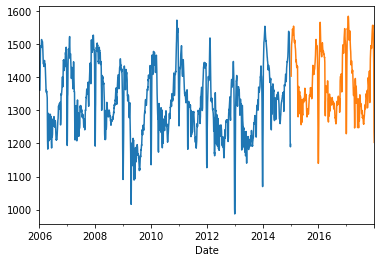

In [162]:
ops.Consumption[train[i]].rolling(7).mean().plot()
ops.Consumption[test[i]].rolling(7).mean().plot()
plt.show()

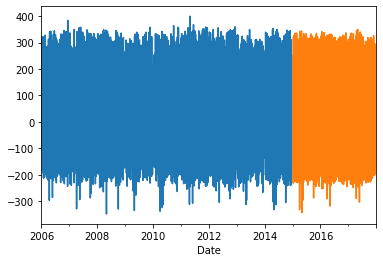

In [163]:
ops.Consumption[train[i]].resample('d').mean().diff().plot()
ops.Consumption[test[i]].resample('d').mean().diff().plot()
plt.show()

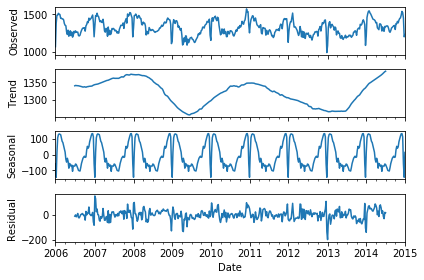

In [164]:
decomp = sm.tsa.seasonal_decompose(ops.Consumption[train[2]].resample('w').mean(), model='addative')
decomp.plot()
plt.show()

In [165]:
#pct cutoff method

In [168]:
train_size = int(len(ops) * .7)
train_size

3068

In [171]:
ops[:train_size].tail(), ops[train_size:].head()

(            Consumption     Wind    Solar  Wind+Solar
 Date                                                 
 2014-05-22     1459.234  112.809  185.338     298.147
 2014-05-23     1429.832   56.471  119.220     175.691
 2014-05-24     1199.258   32.656  140.007     172.663
 2014-05-25     1089.246   34.690  193.159     227.849
 2014-05-26     1429.811  138.365  137.176     275.541,
             Consumption     Wind    Solar  Wind+Solar
 Date                                                 
 2014-05-27     1464.019  189.127   70.470     259.597
 2014-05-28     1441.622  189.686   60.001     249.687
 2014-05-29     1128.151   76.746   83.043     159.789
 2014-05-30     1261.208   59.239  138.099     197.338
 2014-05-31     1147.440  105.023  189.115     294.138)